In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.cbook as cbook
import warnings
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [2]:
datasets=["youtube","dblp","amazon"] + ["lj"] * 8 + ["orkut"] * 3
dataset_min_nodes=[16,16,21] + list(range(51,131,10)) + [151,251,351]
dataset_max_nodes=[20,20,25] + list(range(55,135,10)) + [155,255,355]
pos=[1,1.5,2,5,6,7,8,9,10,11,12,15,25,35]
visible = [0,1,0,1,0,1,0,1,0,1,0,1,1,1]


#sources=["node2vec","deepWalk"]
#targets=["TransE","TransH", "TransD", "SimplE", "DistMult"]
sources=["node2vec"]
targets=["TransE"]

dim=32


In [3]:
plot_type = 'timing'
plot_path = os.path.join('../plots/', str(dim), plot_type)
df = pd.read_csv('../data/' + plot_type + '.csv',sep=',', index_col=False, error_bad_lines=False)
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

b'Skipping line 41592: expected 10 fields, saw 14\nSkipping line 41646: expected 10 fields, saw 14\nSkipping line 41650: expected 10 fields, saw 14\nSkipping line 41661: expected 10 fields, saw 14\nSkipping line 41662: expected 10 fields, saw 14\nSkipping line 41671: expected 10 fields, saw 14\nSkipping line 41780: expected 10 fields, saw 14\nSkipping line 41788: expected 10 fields, saw 14\nSkipping line 41879: expected 10 fields, saw 14\nSkipping line 41883: expected 10 fields, saw 14\nSkipping line 42772: expected 10 fields, saw 14\nSkipping line 42786: expected 10 fields, saw 14\n'
b'Skipping line 67197: expected 10 fields, saw 14\nSkipping line 67218: expected 10 fields, saw 14\nSkipping line 67245: expected 10 fields, saw 14\nSkipping line 67335: expected 10 fields, saw 14\nSkipping line 67373: expected 10 fields, saw 14\nSkipping line 67421: expected 10 fields, saw 14\nSkipping line 67942: expected 10 fields, saw 14\nSkipping line 67952: expected 10 fields, saw 14\nSkipping line 

In [4]:
df.columns

Index(['TIMSTAMP', 'DATASET', 'SIZE', 'GRAPH', 'DIM', 'METHOD', 'ALGORITHM_1',
       'ALGORITHM_2', 'RUN_TIME', 'PARAMS'],
      dtype='object')

In [5]:
df.head()

,TIMSTAMP,DATASET,SIZE,GRAPH,DIM,METHOD,ALGORITHM_1,ALGORITHM_2,RUN_TIME,PARAMS
0,07/15/2019 15:52:23,orkut,151-155,0,32,target,SimplE,NaN,1.036271,Epochs=200
1,07/15/2019 15:52:24,youtube,16-20,0,32,target,TransH,NaN,0.518758,Epochs=200
2,07/15/2019 15:52:27,youtube,16-20,0,32,target,TransD,NaN,0.531779,Epochs=200
3,07/15/2019 15:52:27,orkut,151-155,0,32,target,TransD,NaN,1.594251,Epochs=200
4,07/15/2019 15:52:27,orkut,351-355,0,32,target,TransE,NaN,3.557251,Epochs=200


In [6]:
df2 = pd.read_csv('../data/' + 'boxplot.csv')
measure = 'MRR'
split='test'
metric='mean'
metric_name = 'Mean'

In [7]:
df2.columns

Index(['DATASET', 'SIZE', 'DIM', 'SOURCE', 'TARGET', 'SPLIT', 'MEASURE',
       'METHOD', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'q1',
       'med', 'q3'],
      dtype='object')

In [8]:
df2.head()

,DATASET,SIZE,DIM,SOURCE,TARGET,SPLIT,MEASURE,METHOD,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
0,youtube,16-20,32,deepWalk,SimplE,test,MRR,source,0.169621,0.088538,0.150454,0.184167,0.300099,0.077733,0.122850,0.167311,0.211388
1,youtube,16-20,32,deepWalk,SimplE,test,MRR,source2target,0.169566,0.088538,0.150454,0.184167,0.300099,0.077733,0.122850,0.167311,0.211388
2,youtube,16-20,32,deepWalk,SimplE,test,MRR,transformed,0.218835,0.115558,0.179624,0.223627,0.425568,0.077572,0.148002,0.201626,0.263560
3,youtube,16-20,32,deepWalk,SimplE,test,MRR,target,0.185378,0.067036,0.168069,0.193595,0.279762,0.077832,0.145194,0.180832,0.212229
4,youtube,16-20,32,deepWalk,SimplE,test,MR,source,8.511087,3.247222,7.643665,8.880145,13.375000,5.250000,6.766667,8.261905,10.013889


In [9]:
def source_transform_time(dataset, graph_size, dim, source, target):
    filt_source = (df['DATASET'] == dataset) & (df['SIZE'] == graph_size) & (df['DIM'] == dim) & (df['METHOD'] == 'source') & \
    (df['ALGORITHM_1'] == source)
    filt_transform = (df['DATASET'] == dataset) & (df['SIZE'] == graph_size) & (df['DIM'] == dim) & (df['METHOD'] == 'transformed') & \
    (df['ALGORITHM_1'] == source) &  (df['ALGORITHM_2'] == target)
    source_rows = df.loc[filt_source][['GRAPH','RUN_TIME']]
    transform_rows =  df.loc[filt_transform][['GRAPH','RUN_TIME']]
    source_rows = source_rows.sort_values(by='GRAPH')
    transform_rows = transform_rows.sort_values(by='GRAPH')
    source = source_rows['RUN_TIME'].values
    transform = transform_rows['RUN_TIME'].values
    total_time = source + transform
    return total_time

In [10]:
if len(targets) == 1:
    ax_title_size = 14
    ax_ylabel_size = 12
    ax_xtick_size = 10
    fig_size = (14,10)
    fig_title_size = 14
    legend_size = 12
    dpi=400
    single_plot=True
else:    
    ax_title_size = 14
    ax_ylabel_size = 12
    ax_xtick_size = 12
    fig_size = (16,14)
    fig_title_size = 18
    legend_size = 14
    dpi=None
    single_plot=False

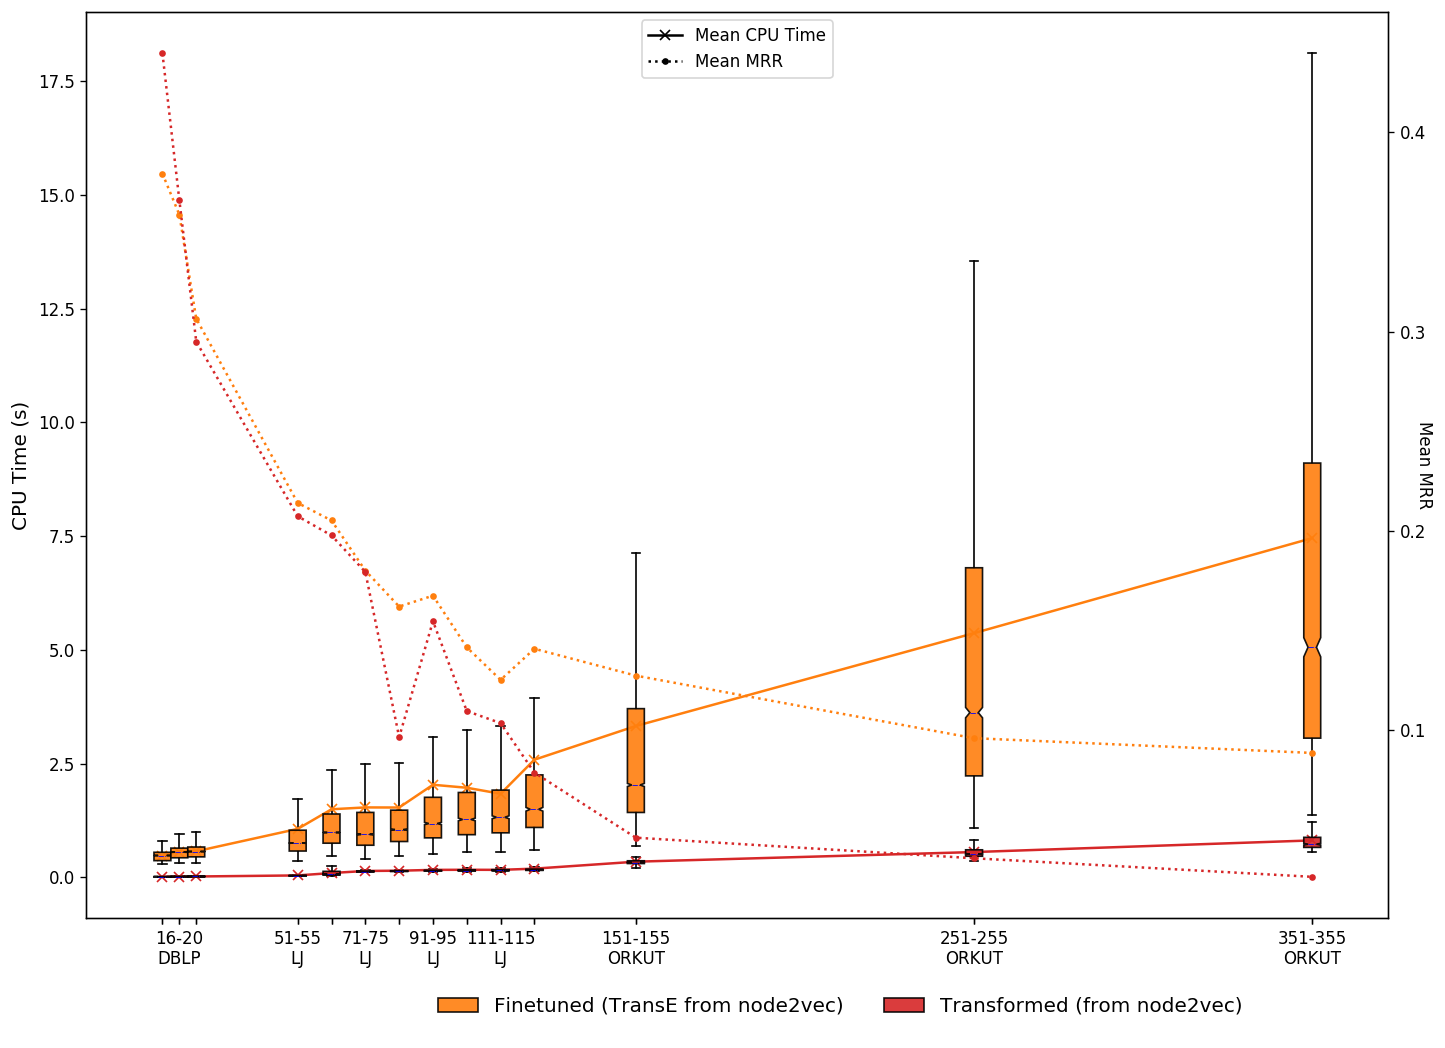

In [11]:
medianprops = dict(linestyle='-.', linewidth=0.5, color='blue')
boxprops_source = dict(facecolor='C1', alpha=0.9)
boxprops_transform = dict(facecolor='C3', alpha=0.9)
fig = plt.figure(figsize=fig_size, dpi= 120, facecolor='w', edgecolor='k')

i=1
lj_count = 0
for target in targets:
    for source in sources:
        ax = fig.add_subplot(len(targets),len(sources),i)
        ax2 = ax.twinx()
        source_stats = []
        transform_stats = []
        source_performance = []
        transform_performance = []
        source_metric = []
        transform_metric = []

        for j, dataset in enumerate(datasets):
            graph_size = str(dataset_min_nodes[j]) + '-' + str(dataset_max_nodes[j])

            filt = (df['DATASET'] == dataset) & \
                (df['SIZE'] == graph_size) & \
                (df['DIM'] == dim) & \
                (df['METHOD'] == 'source2target') & \
                (df['ALGORITHM_1'] == source) 

            row = df.loc[filt]
            stats = cbook.boxplot_stats(list(row['RUN_TIME']))[0]
            stats['label']=''
            stats['fliers']=[]    
            source_stats.append(stats)
            source_metric.append(stats[metric])

            x = source_transform_time(dataset, graph_size, dim, source, target)
            stats = cbook.boxplot_stats(x)[0]
            stats['label']='{}\n{}'.format(graph_size,dataset.upper())
            stats['fliers']=[]    
            transform_stats.append(stats)
            transform_metric.append(stats[metric])
            
            filt = (df2['DATASET'] == dataset) & \
                    (df2['SIZE'] == graph_size) & \
                    (df2['DIM'] == dim) & \
                    (df2['SOURCE'] == source) & \
                    (df2['TARGET'] == target) & \
                    (df2['MEASURE'] == measure) & \
                    (df2['SPLIT'] == split)
            
            filt_source = filt & (df2['METHOD'] == 'source2target')
            filt_transformed = filt & (df2['METHOD'] == 'transformed')
            row_source = df2.loc[filt_source]
            row_trans = df2.loc[filt_transformed]
            source_performance.append((row_source[metric]).item())
            transform_performance.append((row_trans[metric]).item())

        bp1 = ax.bxp(source_stats,positions=pos,shownotches=True,patch_artist=True,medianprops=medianprops, boxprops=boxprops_source)
        bp2 = ax.bxp(transform_stats,positions=pos,shownotches=True,patch_artist=True,medianprops=medianprops, boxprops=boxprops_transform)
        
        #C = 'C1'
        #for bps in [bp1, bp2]:
            #x = [whisker.get_data()[0][0] for whisker in bps['whiskers'][0:len(datasets)*2:2]]
            #y = [median.get_data()[1][0] for median in bps['medians']]
            #ax.plot(x,y,marker='x', linestyle='-.', color=C)
            #C = 'C2'
        
        ax.plot(pos,source_metric,marker='x', linestyle='-', color='C1',
                label='{} {} for Finetuning'.format(metric_name, 'CPU Time'))
        ax.plot(pos, transform_metric,marker='x', linestyle='-', color='C3',
               label='{} {} for Transformation'.format(metric_name, 'CPU Time'))
        
        ax2.plot(pos, source_performance, color='C1',marker='.', linestyle=':', 
                 label='{} {} for Finetuning'.format(metric_name, measure,source,target))
        ax2.plot(pos, transform_performance, color='C3', marker='.', linestyle=':', 
                 label='{} {} for Transformation'.format(metric_name, measure))
        
        if single_plot:
            ax.set_ylabel('CPU Time (s)',fontsize=ax_ylabel_size)
            #ax.set_title('Performance evaluation of Finetuned vs Transformed embeddings'.format(source,target),fontsize=ax_title_size)
            ax2.set_ylabel('{} {}'.format(metric_name,measure),rotation=270)
            legend_elements = [Line2D([0], [0], color='black', linestyle='-', marker='x', label='Mean CPU Time'),
                               Line2D([0], [0], color='black', linestyle=':', marker='.', label='Mean MRR')]
            
            ax.legend(handles=legend_elements, loc='upper center')
            
            for k, tick in enumerate(ax.xaxis.get_major_ticks()):
                if k < len(datasets):
                     tick.label1.set_visible(False)
                else:
                    index = k-len(datasets)
                    tick.label1.set_visible(visible[index]==1)
                    tick.label.set_fontsize(ax_xtick_size)
        else:
            ax2.set_ylim(0,1)
            
            if i%2 == 1:
                ax.set_ylabel(target,fontsize=ax_ylabel_size)
            if i == 1 or i == 2:
                ax.set_title(source.upper(),fontsize=ax_title_size)
        
            for k, tick in enumerate(ax.xaxis.get_major_ticks()):
                if i <= (len(targets) - 1) * len(sources):
                    tick.label1.set_visible(False)
                else:
                    if k < len(datasets):
                        tick.label1.set_visible(False)
                    else:
                        index = k-len(datasets)
                        tick.label1.set_visible(visible[index]==1)
                        tick.label.set_fontsize(ax_xtick_size)
        i += 1

plt.subplots_adjust(hspace=0.2, wspace=0.2)
fig.legend([bp1['boxes'][0], bp2['boxes'][0]], ['Finetuned ({} from {})'.format(target, source), 'Transformed (from {})'.format(source)],loc='lower center',borderpad=0,bbox_to_anchor= (0.5, 0.01), ncol=2, 
        borderaxespad=1, frameon=False, fontsize=legend_size)

if single_plot:
    fig.savefig(os.path.join(plot_path, '{}-{}.png'.format(source,target)),dpi=dpi,bbox_inches='tight')
else:
    fig.savefig(os.path.join(plot_path, 'SizeVsTiming.png'),dpi=dpi,bbox_inches='tight')
            